In [13]:
class Node:
    def __init__(self, data):
       self.data = data
       self.next = None
       self.prev = None
 
 
class DoublyLinkedList:
    def __init__(self):
        self.first = None
        self.last = None
 
    def get_node(self, index):
        current = self.first
        for i in range(index):
            if current is None:
                return None
            current = current.next
        return current
 
    def insert_after(self, ref_node, new_node):
        new_node.prev = ref_node
        if ref_node.next is None:
            self.last = new_node
        else:
            new_node.next = ref_node.next
            new_node.next.prev = new_node
        ref_node.next = new_node
 
    def insert_at_beg(self, new_node):
        if self.first is None:
            self.first = new_node
            self.last = new_node
        else:
            self.insert_before(self.first, new_node)
    def insert_before(self, ref_node, new_node):
        new_node.next = ref_node
        if ref_node.prev is None:
            self.first = new_node
        else:
            new_node.prev = ref_node.prev
            new_node.prev.next = new_node
        ref_node.prev = new_node
 
    def insert_at_end(self, new_node):
        if self.last is None:
            self.last = new_node
            self.first = new_node
        else:
            self.insert_after(self.last, new_node)
            new_node.prev = self.last
            if self.last.next is None:
                self.last = new_node
            else:
                new_node.next = self.last.next
                new_node.next.prev = new_node
            self.last.next = new_node
            new_node.next=self.first
            
 
    def remove(self, node):
        if node.prev is None:
            self.first = node.next
        else:
            node.prev.next = node.next
 
        if node.next is None:
            self.last = node.prev
        else:
            node.next.prev = node.prev
 
    def display(self):
        current = self.first
        while current !=self.last:
            print(current.data, end = ' ')
            current = current.next
        print(current.data, end = ' ')
    def len_list(self):
        i=0
        current = self.first
        while current !=self.last:
            i=i+1
            current = current.next
        i=i+1
        return i
import string
import numpy as np
import matplotlib.pyplot as plt
import copy
class Point:
    """ Point Class """
    def __init__(self,tup):
        self.x=tup[0]
        self.y=tup[1]
 
    def __init__(self, xcoord, ycoord):
        self.x = xcoord
        self.y = ycoord
 
    @classmethod
    def input_point(point):
        """ Takes X-Coord and Y-Coord from user to form a point """
        return point(
            int(input('  X-Coord: ')),
            int(input('  Y-Coord: ')),
        )
 
    def __str__(self):
        """ Displays point's coordinates """
        return "(" + str(self.x) + ", " + str(self.y) + ")"
 

 
def dir(A,B,P):
    #print(A,B,P)
    c=copy.deepcopy(B)
    d=copy.deepcopy(P)
    c.x -= A.x 
    c.y -= A.y 
    d.x -= A.x 
    d.y -= A.y 
    #print(c,d)
    ' Determining cross Product '
    cross_product = c.x * d.y - c.y * d.x  
    #print(cross_product)
    if (cross_product > 0): 
        return 1
    elif (cross_product < 0): 
        return -1
    else:
        return 0

def Checkintersec(A,B,C,D):
    #print(A,B,C,D)
    if (dir(A,B,C)==0):
            return 0
                
    elif (dir(A,B,D)==0):
            return 0
    elif ((dir(A,B,C)!=dir(A,B,D)) and (dir(C,D,A)!=dir(C,D,B))):
            return 1
        
    else:
            return 0

        

           

In [14]:
def directionOfPoint(A,B,P):
    c=copy.deepcopy(B)
    c.x -= A.x 
    c.y -= A.y 
    P.x -= A.x 
    P.y -= A.y 
    #print(c,P)
    ' Determining cross Product '
    cross_product = c.x * P.y - c.y * P.x    
    if (cross_product > 0): 
        print("left turn so area is positive\t",cross_product/2,"\twith line segment",A,B)
    elif (cross_product < 0): 
        print("right turn so area is negative\t",cross_product/2,"\twith line segment",A,B)
    else:
        print("colinear area\t",cross_product/2,"\twith line segment",A,B)

In [15]:
def checkconvex(poly):
    flag=1
    current = poly.first
    while current !=poly.last:
            a=copy.deepcopy(current.data)
            b=copy.deepcopy(current.next.data)
            c=copy.deepcopy(current.next.next.data) 
            if dir(a,b,c)==-1:
                flag=0
                break
            current = current.next
    a=copy.deepcopy(current.data)
    b=copy.deepcopy(current.next.data)
    c=copy.deepcopy(current.next.next.data) 
    if dir(a,b,c)==-1:
                flag=0
    return flag
           
       

In [16]:
def checkin(poly,coord):
    infile=open('query.txt', 'r')
    cord = infile.read().split(' ')
    cord = list(map(int, cord))
    i=0
    while i in range (0,len(cord)):
            flag=1
            qp=Point(cord[i],cord[i+1])
            current = poly.first
            while current !=poly.last:
                    a=copy.deepcopy(current.data)
                    b=copy.deepcopy(current.next.data)
                    c=copy.deepcopy(qp)
                    if dir(a,b,c)==-1:
                        flag=0
                        break
                    current = current.next
            a=copy.deepcopy(current.data)
            b=copy.deepcopy(current.next.data)
            c=copy.deepcopy(qp) 
            xs, ys = zip(*coord) #create lists of x and y values
            plt.figure()
            plt.plot(xs,ys) 
            plt.plot([cord[i]], [cord[i+1]], marker='o', markersize=3, color="red")
            plt.show()
            if dir(a,b,c)==-1:
                        flag=0
            if flag==0:
                print("the point",qp,"dosent lie inside polygon")
            else:
                print("the point",qp," lie inside polygon")
            i=i+2
    

In [21]:
def raycast(poly,coord):
    endpoint=Point(100,100)
    infile=open('query.txt', 'r')
    cord = infile.read().split(' ')
    cord = list(map(int, cord))
    i=0
    while i in range (0,len(cord)):
            count=0
            qp=Point(cord[i],cord[i+1])
            current = poly.first
            while current !=poly.last:
                    a=copy.deepcopy(current.data)
                    b=copy.deepcopy(current.next.data)
                    c=copy.deepcopy(qp)
                    d=copy.deepcopy(endpoint)
                    count= Checkintersec(a,b,c,d) + count
                    current = current.next
            a=copy.deepcopy(current.data)
            b=copy.deepcopy(current.next.data)
            c=copy.deepcopy(qp) 
            d=copy.deepcopy(endpoint)
            count= Checkintersec(a,b,c,d) + count
            if count%2==0:
                print("the point",qp,"doesnt lies inside polygon with",count,"intersections")
                
            else:
                print("the point",qp," lies inside polygon with",count,"intersections")
            xs, ys = zip(*coord) 
            #create lists of x and y values
            plt.figure()
            plt.plot(xs,ys) 
            m=[cord[i],cord[i+1],100,100]
            m1=[tuple(m[z: z + 2]) for z in range(0, len(m), 2)]
            x1, y1 = zip(*m1)
            plt.plot(x1,y1,color='r')
            plt.show()
            i=i+2

(20, 20) (25, 30) (40, 40) (30, 50) (10, 45) None  is not convex
the point (27, 30) doesnt lies inside polygon with 2 intersections


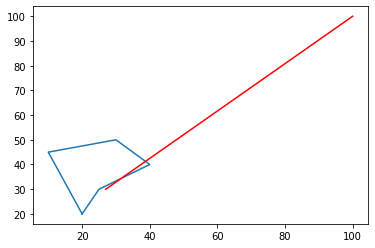

the point (30, 30) doesnt lies inside polygon with 2 intersections


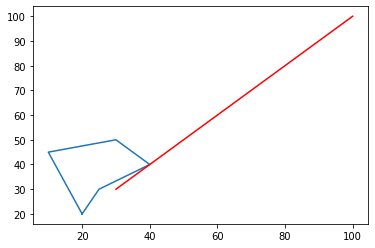

the point (2, 2) doesnt lies inside polygon with 4 intersections


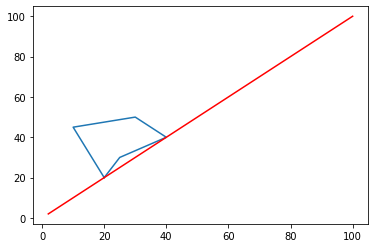

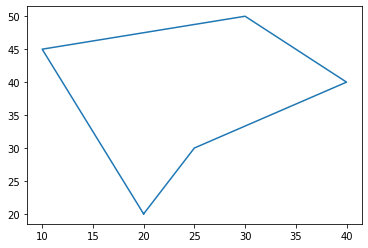

In [22]:
import math
infile=open('polygo.txt', 'r')
cord = infile.read().split('\n')
for i in range(0,len(cord)):
    poly=cord[i].split()
    poly = list(map(int, poly))
    l1=DoublyLinkedList()
    pp=[tuple(poly[z: z + 2]) for z in range(0, len(poly), 2)]
    cent=(sum([p[0] for p in pp])/len(pp),sum([p[1] for p in pp])/len(pp))
    # sort by polar angle
    pp.sort(key=lambda p: math.atan2(p[1]-cent[1],p[0]-cent[0]))
    coord=copy.deepcopy(pp)
    coord.append(coord[0])
    p=[item for t in pp for item in t]
    poly=p
    #print(poly)
    j=0
    k=0
    while j in range (j,len(poly)):
        #print (j,len(poly))
        a=Point(poly[j],poly[j+1])
        new_node=Node(a)
        if k==0:
            l1.insert_at_beg(new_node)
        elif j<(len(poly)-2):
            ref_node = l1.get_node(k-1)
            l1.insert_after(ref_node,new_node)
        else:
            l1.insert_at_end(new_node)            
        j=j+2
        k=k+1
        #print(j)
    #l1.display()    
    l2=copy.deepcopy(l1)
    c=checkconvex(l2)
    if c==0:
        print(l1.display()," is not convex")
        xs, ys = zip(*coord) #create lists of x and y values
        l3=copy.deepcopy(l1)
        raycast(l3,coord)
        plt.figure()
        plt.plot(xs,ys)
        plt.show()
        #print(coord)
    else:
        print(l1.display()," is convex")
        print("\n checking for inclusion")
        checkin(l2,coord)
        l3=copy.deepcopy(l1)
        raycast(l3,coord)

        
